In [178]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [179]:
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [181]:
house.shape

(1460, 81)

In [182]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [183]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [184]:
#cheked any null column exist or not
nuni = house.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [185]:
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [186]:
#Drop columns with maximum missing values
house = house.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [187]:
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [188]:
#fill missing values of FireplaceQu with NA
house.FireplaceQu = house.FireplaceQu.fillna('NA')

In [189]:
#fill missing values of LotFrontage with median
house.LotFrontage = house.LotFrontage.fillna(house.LotFrontage.median())

In [190]:
#replace Nan values of MasVnrType with None i.e. No Masonary type
house.MasVnrType = house.MasVnrType.fillna('None')

In [191]:
#impute missing values of MasVnrArea with median 
house.MasVnrArea = house.MasVnrArea.fillna(house.MasVnrArea.median())   

In [192]:
#replace Nan values of GarageType with NA i.e. No Garage
house.GarageType = house.GarageType.fillna('NA')

In [193]:
#replace Nan values of GarageYrBlt with 0 
house.GarageYrBlt = house.GarageYrBlt.fillna(0)

In [194]:
#replace Nan values of GarageFinish with NA 
house.GarageFinish = house.GarageFinish.fillna('NA')

In [195]:
#replace Nan values of GarageQual with NA 
house.GarageQual = house.GarageQual.fillna('NA')

In [196]:
#replace Nan values of GarageCond with NA i.e. No Garage
house.GarageCond = house.GarageCond.fillna('NA')

In [197]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house.BsmtQual = house.BsmtQual.fillna('NA')

In [198]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house.BsmtCond = house.BsmtCond.fillna('NA')

In [199]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house.BsmtExposure = house.BsmtExposure.fillna('No')

In [200]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house.BsmtFinType1 = house.BsmtFinType1.fillna('NA')

In [201]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house.BsmtFinType2 = house.BsmtFinType2.fillna('NA')

In [202]:
#impute missing values of Electrical with mode due to categorical column
house.Electrical = house.Electrical.fillna(house.Electrical.mode()[0])    

In [203]:
house.isnull().sum()[house.isnull().sum()>0]

Series([], dtype: int64)

In [204]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [205]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house['HouseAge'] = house.YrSold - house.YearBuilt
house.shape

(1460, 78)

In [206]:
#Drop YrSold, YearBuilt after HouseAge
house=house.drop(columns=['YrSold', 'YearBuilt'])
house.shape

(1460, 76)

In [207]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [208]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house = house.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [209]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house = house.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [210]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house = house.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [211]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [212]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [213]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house = house.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [214]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house = house.astype(convert_dict)

In [215]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [216]:
for c in house.columns:
    if house[c].dtype == object :
        print(c)
        print(house[c].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [217]:
#Drop columns which have more than 80% bias data
house = house.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [218]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [219]:
#Get all object type columns
object_columns = []
for c in house.columns:
    if house[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [220]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house['MSSubClass'],drop_first=True, prefix='MSSubClass').astype(int)
#concat MSSubClass_df with main house_data df
house = pd.concat([house,MSSubClass_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [221]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house['MSZoning'],drop_first=True, prefix='MSZoning').astype(int)
#concat MSZoning_df with main house_data df
house = pd.concat([house,MSZoning_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,0,1,0


In [222]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house['LotShape'],drop_first=True, prefix='LotShape').astype(int)
#concat LotShape_df with main house_data df
house = pd.concat([house,LotShape_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,1,0,0,0,0


In [223]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house['LotConfig'],drop_first=True, prefix='LotConfig').astype(int)
#concat LotConfig_df with main house_data df
house = pd.concat([house,LotConfig_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,1,0,0


In [224]:
Neighborhood_df = pd.get_dummies(house['Neighborhood'],drop_first=True, prefix='Neighborhood').astype(int)
#concat LotConfig_df with main house_data df
house = pd.concat([house,Neighborhood_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [225]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house['HouseStyle'],drop_first=True, prefix='HouseStyle').astype(int)
#concat HouseStyle_df with main house_data df
house = pd.concat([house,HouseStyle_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [226]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house['RoofStyle'],drop_first=True, prefix='RoofStyle').astype(int)
#concat RoofStyle_df with main house_data df
house = pd.concat([house,RoofStyle_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,1,0,0,0,0


In [227]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house['Exterior1st'],drop_first=True, prefix='Exterior1st').astype(int)
#concat Exterior1st_df with main house_data df
house = pd.concat([house,Exterior1st_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [228]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house['Exterior2nd'],drop_first=True, prefix='Exterior2nd').astype(int)
#concat Exterior2nd_df with main house df
house = pd.concat([house,Exterior2nd_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [229]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house['MasVnrType'],drop_first=True, prefix='MasVnrType').astype(int)
#concat MasVnrType_df with main house_data df
house = pd.concat([house,MasVnrType_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,1,0,0,1,0,0


In [230]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house['Foundation'],drop_first=True, prefix='Foundation').astype(int)
#concat Foundation_df with main house_data df
house = pd.concat([house,Foundation_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,0,1,0,0,0


In [231]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house['GarageType'],drop_first=True, prefix='GarageType').astype(int)
#concat GarageType_df with main house_data df
house = pd.concat([house,GarageType_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,1,0,0,0,0,0


In [232]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house['GarageFinish'],drop_first=True, prefix='GarageFinish').astype(int)
#concat GarageFinish_df with main house_data df
house = pd.concat([house,GarageFinish_df],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,0,1,0


In [233]:
house.shape

(1460, 162)

In [234]:
#Drop categorical variables after ceating dummy varaibles
house = house.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [235]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int32(107), int64(39)
memory usage: 1.1 MB


### Prepairing Data For Modeling

In [236]:
df_train,df_test = train_test_split(house,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [237]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescalling The Numeric Factors

In [238]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,...,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,...,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,1
1416,-0.433386,0.082504,-1.496155,0.384025,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,0,1,0,0,0,1
390,-0.886290,-0.202365,-0.781333,2.216221,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.280781,...,0,0,0,0,0,1,0,0,0,1


In [239]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.102509e+01,1.987332e+01,2.792775e+00,3.132319e+00,1.214656e+00,7.986733e+00,2.802485e+00,1.689151e+00,2.181065e+00,1.138412e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training The Model

In [240]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [241]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=148)

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [242]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [243]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 48),
 ('LotArea', False, 43),
 ('OverallQual', True, 1),
 ('OverallCond', False, 7),
 ('YearRemodAdd', False, 95),
 ('MasVnrArea', False, 84),
 ('ExterQual', False, 56),
 ('BsmtQual', False, 3),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 63),
 ('BsmtFinSF1', False, 14),
 ('BsmtFinSF2', False, 19),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', False, 20),
 ('HeatingQC', False, 104),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 17),
 ('GrLivArea', False, 16),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 93),
 ('FullBath', False, 88),
 ('HalfBath', False, 75),
 ('BedroomAbvGr', False, 77),
 ('KitchenAbvGr', False, 31),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 73),
 ('Fireplaces', False, 85),
 ('FireplaceQu', False, 97),
 ('GarageYrBlt', False, 109),
 ('GarageCars', True, 1),
 ('GarageArea', False, 87),
 ('WoodDeckSF', False, 91),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', False, 102),
 ('3SsnPorch', Fal

In [244]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

In [245]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_CarPort',
       'GarageFinish_Unf'],
      dtype='object', length=113)

### Building model using statsmodel, for the detailed statistics

In [246]:
#ceating X_train with RFE selected columns
X_train_rfe = X_train[col]

In [247]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [248]:

#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [249]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:28   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [250]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
34,GarageFinish_NA,inf
33,GarageType_NA,inf
0,const,109.09
29,GarageType_Attchd,26.85
32,GarageType_Detchd,21.88
28,Exterior2nd_CmentBd,18.94
24,Exterior1st_CemntBd,18.83
31,GarageType_BuiltIn,7.72
7,MSSubClass_45,6.68
20,HouseStyle_1.5Unf,6.66


MSSubClass_45 0.392
2) MSSubClass_180 0.576
LotShape_IR3 0.143
LotConfig_FR3 0.327
Neighborhood_ClearCr 0.221
Neighborhood_NPkVill 0.460
3) HouseStyle_1.5Unf 0.505
RoofStyle_Gambrel 0.336
Exterior1st_AsphShn 0.292
---1) Exterior1st_CemntBd 0.358
Exterior1st_ImStucc	0.378
1) Exterior1st_Stone	0.584
---2) Exterior2nd_CmentBd 0.212
GarageType_Basment 0.410

___GarageType_NA has higher VIF. Lets drop it.___

In [251]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [252]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF',
       'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180',
       'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without GarageType_NA___

In [253]:
X_train_lm = sm.add_constant(X_train_new)

In [254]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [255]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:32   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [256]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,109.09
29,GarageType_Attchd,26.85
32,GarageType_Detchd,21.88
28,Exterior2nd_CmentBd,18.94
24,Exterior1st_CemntBd,18.83
31,GarageType_BuiltIn,7.72
33,GarageFinish_NA,7.46
7,MSSubClass_45,6.68
20,HouseStyle_1.5Unf,6.66
1,OverallQual,3.23


___const has higher VIF. Lets drop it.___

In [257]:

X_train_new = X_train_new.drop(['const'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without const___

In [258]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


In [259]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:33   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [260]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [261]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
27,Exterior2nd_CmentBd,19.65
23,Exterior1st_CemntBd,19.54
6,MSSubClass_45,6.76
19,HouseStyle_1.5Unf,6.75
0,OverallQual,3.12
5,GarageCars,2.61
2,1stFlrSF,2.12
4,KitchenQual,2.06
28,GarageType_Attchd,2.06
31,GarageType_Detchd,1.84


___Exterior2nd_CmentBd has higher VIF. Lets drop it.___

In [262]:
X_train_new = X_train_new.drop(['Exterior2nd_CmentBd'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without Exterior2nd_CmentBd___

In [263]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:35   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.439e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.935      0.000    1.32e+05    1.75e+05
OverallQual           2.009e+04   1893.236     10.610      0.000    1.64e+04    2.38e+04
BsmtExposure          1.092e+04   1228.951      8.885      0.000    8508.083    1.33e+04
1stFlrSF              2.322e+04   1536.005     15.117      0.000    2.02e+04    2.62e+04
2ndFlrSF              1.891e+04   1428.003     13.242      0.000    1.61e+04    2.17e+04
KitchenQual           1.022e+04   1511.626      6.761      0.000    7253.566    1.32e+04
GarageCars            9551.8978   1711.356      5.581      0.000    6193.584    1.29e+04
MSSubClass_45        -2.279e+04   2.64e+04     -0.863      0.388   -7.46e+04     2.9e+04
MSSubClass_180       -7922.5561   1.54e+04     -0.513      0.608   -3.82e+04    2.24e+04
MSSubClass_190       -1.274e+04   7223.160     -1.763      0.078   -2.69e+04    1436.983
MSZoning_RM          -1.595e+04   3439.707     -4.636      0.000   -2.27e+04   -9197.641
LotShape_IR3         -1.718e+04   1.15e+04     -1.488      0.137   -3.98e+04    5477.490
LotConfig_FR3        -1.933e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9544.1399   7893.399      1.209      0.227   -5945.633     2.5e+04
Neighborhood_Edwards   -1.4e+04   4342.137     -3.225      0.001   -2.25e+04   -5480.468
Neighborhood_NPkVill -1.023e+04   1.39e+04     -0.735      0.462   -3.75e+04    1.71e+04
Neighborhood_NoRidge  6.193e+04   6575.503      9.419      0.000     4.9e+04    7.48e+04
Neighborhood_NridgHt  4.415e+04   5410.360      8.161      0.000    3.35e+04    5.48e+04
Neighborhood_Somerst  1.705e+04   5027.480      3.391      0.001    7184.729    2.69e+04
Neighborhood_StoneBr  2.205e+04   9830.299      2.243      0.025    2755.733    4.13e+04
HouseStyle_1.5Unf     1.638e+04   2.43e+04      0.675      0.500   -3.12e+04     6.4e+04
RoofStyle_Gambrel     1.912e+04   1.97e+04      0.971      0.332   -1.95e+04    5.78e+04
Exterior1st_AsphShn  -3.606e+04   3.43e+04     -1.053      0.293   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6437.931      2.563      0.011    3869.153    2.91e+04
Exterior1st_CemntBd   7010.6946   6285.475      1.115      0.265   -5323.736    1.93e+04
Exterior1st_ImStucc  -3.031e+04   3.44e+04     -0.881      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.352e+04   2.43e+04     -0.557      0.577   -6.11e+04    3.41e+04
Exterior1st_Stucco   -1.546e+04   7840.090     -1.972      0.049   -3.08e+04     -72.365
GarageType_Attchd     2.981e+04   1.11e+04      2.684      0.007    8013.921    5.16e+04
GarageType_Basment    1.217e+04   1.49e+04      0.817      0.414   -1.71e+04    4.14e+04
GarageType_BuiltIn    2.654e+04    1.2e+04      2.212      0.027    2998.318    5.01e+04
GarageType_Detchd     2.067e+04   1.11e+04      1.860    

In [264]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
6,MSSubClass_45,6.76
19,HouseStyle_1.5Unf,6.75
0,OverallQual,3.12
5,GarageCars,2.61
2,1stFlrSF,2.12
4,KitchenQual,2.06
27,GarageType_Attchd,2.05
30,GarageType_Detchd,1.84
3,2ndFlrSF,1.83
31,GarageFinish_NA,1.83


___HouseStyle_1.5Unf has higher VIF and p-value. Lets drop it.___

In [265]:
X_train_new = X_train_new.drop(['HouseStyle_1.5Unf'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without HouseStyle_1.5Unf___

In [266]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     145.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:37   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     988   BIC:                         2.438e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.935      0.000    1.32e+05    1.75e+05
OverallQual           2.017e+04   1888.960     10.676      0.000    1.65e+04    2.39e+04
BsmtExposure          1.089e+04   1228.031      8.871      0.000    8484.359    1.33e+04
1stFlrSF               2.32e+04   1535.426     15.113      0.000    2.02e+04    2.62e+04
2ndFlrSF              1.886e+04   1425.486     13.229      0.000    1.61e+04    2.17e+04
KitchenQual           1.016e+04   1508.691      6.735      0.000    7200.438    1.31e+04
GarageCars            9498.6131   1709.063      5.558      0.000    6144.802    1.29e+04
MSSubClass_45        -6439.4036   1.05e+04     -0.614      0.540    -2.7e+04    1.42e+04
MSSubClass_180       -7805.5143   1.54e+04     -0.506      0.613   -3.81e+04    2.25e+04
MSSubClass_190       -1.202e+04   7143.393     -1.683      0.093    -2.6e+04    1994.182
MSZoning_RM          -1.605e+04   3435.197     -4.673      0.000   -2.28e+04   -9312.178
LotShape_IR3         -1.717e+04   1.15e+04     -1.488      0.137   -3.98e+04    5480.700
LotConfig_FR3         -1.93e+04   1.97e+04     -0.980      0.327   -5.79e+04    1.93e+04
Neighborhood_ClearCr  9582.9460   7891.015      1.214      0.225   -5902.130    2.51e+04
Neighborhood_Edwards -1.404e+04   4340.555     -3.235      0.001   -2.26e+04   -5522.699
Neighborhood_NPkVill -1.032e+04   1.39e+04     -0.741      0.459   -3.76e+04     1.7e+04
Neighborhood_NoRidge    6.2e+04   6573.061      9.432      0.000    4.91e+04    7.49e+04
Neighborhood_NridgHt  4.415e+04   5408.861      8.162      0.000    3.35e+04    5.48e+04
Neighborhood_Somerst  1.701e+04   5025.737      3.385      0.001    7147.642    2.69e+04
Neighborhood_StoneBr  2.199e+04   9827.221      2.238      0.025    2704.234    4.13e+04
RoofStyle_Gambrel      1.92e+04   1.97e+04      0.975      0.330   -1.94e+04    5.78e+04
Exterior1st_AsphShn    -3.6e+04   3.42e+04     -1.051      0.293   -1.03e+05    3.12e+04
Exterior1st_BrkFace   1.647e+04   6435.940      2.559      0.011    3837.319    2.91e+04
Exterior1st_CemntBd   7062.3813   6283.277      1.124      0.261   -5267.721    1.94e+04
Exterior1st_ImStucc  -3.045e+04   3.44e+04     -0.885      0.376    -9.8e+04    3.71e+04
Exterior1st_Stone    -1.347e+04   2.42e+04     -0.556      0.579   -6.11e+04    3.41e+04
Exterior1st_Stucco   -1.546e+04   7837.930     -1.972      0.049   -3.08e+04     -74.925
GarageType_Attchd     2.986e+04   1.11e+04      2.689      0.007    8072.089    5.16e+04
GarageType_Basment     1.22e+04   1.49e+04      0.819      0.413    -1.7e+04    4.14e+04
GarageType_BuiltIn    2.664e+04    1.2e+04      2.222      0.027    3111.350    5.02e+04
GarageType_Detchd     2.078e+04   1.11e+04      1.870      0.062   -1025.506    4.26e+04
GarageFinish_NA       3.595e+04   1.25e+04      2.867    

In [267]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.10
5,GarageCars,2.60
2,1stFlrSF,2.12
26,GarageType_Attchd,2.05
4,KitchenQual,2.05
29,GarageType_Detchd,1.84
3,2ndFlrSF,1.83
30,GarageFinish_NA,1.83
31,GarageFinish_RFn,1.72
9,MSZoning_RM,1.59


___MSSubClass_180 has higher p-value. Lets drop it.___

In [268]:
X_train_new = X_train_new.drop(['MSSubClass_180'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_45', 'MSSubClass_190', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without MSSubClass_180___

In [269]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     149.8
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:38   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     989   BIC:                         2.437e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.535e+05    1.1e+04     13.958      0.000    1.32e+05    1.75e+05
OverallQual           2.026e+04   1878.666     10.786      0.000    1.66e+04    2.39e+04
BsmtExposure           1.08e+04   1212.353      8.906      0.000    8417.626    1.32e+04
1stFlrSF              2.328e+04   1527.024     15.247      0.000    2.03e+04    2.63e+04
2ndFlrSF              1.889e+04   1423.796     13.265      0.000    1.61e+04    2.17e+04
KitchenQual           1.014e+04   1507.547      6.726      0.000    7181.582    1.31e+04
GarageCars            9507.1359   1708.337      5.565      0.000    6154.754    1.29e+04
MSSubClass_45        -6321.0792   1.05e+04     -0.603      0.547   -2.69e+04    1.43e+04
MSSubClass_190       -1.191e+04   7137.214     -1.669      0.095   -2.59e+04    2095.013
MSZoning_RM          -1.631e+04   3397.654     -4.799      0.000    -2.3e+04   -9637.676
LotShape_IR3         -1.718e+04   1.15e+04     -1.489      0.137   -3.98e+04    5461.636
LotConfig_FR3        -1.918e+04   1.97e+04     -0.974      0.330   -5.78e+04    1.94e+04
Neighborhood_ClearCr  9674.8244   7885.956      1.227      0.220   -5800.304    2.51e+04
Neighborhood_Edwards -1.407e+04   4338.499     -3.243      0.001   -2.26e+04   -5557.400
Neighborhood_NPkVill -1.038e+04   1.39e+04     -0.746      0.456   -3.77e+04    1.69e+04
Neighborhood_NoRidge  6.177e+04   6555.683      9.423      0.000    4.89e+04    7.46e+04
Neighborhood_NridgHt  4.409e+04   5405.606      8.156      0.000    3.35e+04    5.47e+04
Neighborhood_Somerst  1.699e+04   5023.622      3.381      0.001    7127.801    2.68e+04
Neighborhood_StoneBr   2.21e+04   9821.252      2.250      0.025    2822.860    4.14e+04
RoofStyle_Gambrel     1.925e+04   1.97e+04      0.978      0.328   -1.94e+04    5.79e+04
Exterior1st_AsphShn  -3.602e+04   3.42e+04     -1.052      0.293   -1.03e+05    3.11e+04
Exterior1st_BrkFace   1.644e+04   6433.272      2.555      0.011    3814.085    2.91e+04
Exterior1st_CemntBd   6042.4820   5948.749      1.016      0.310   -5631.138    1.77e+04
Exterior1st_ImStucc  -3.051e+04   3.44e+04     -0.887      0.375    -9.8e+04     3.7e+04
Exterior1st_Stone    -1.372e+04   2.42e+04     -0.566      0.572   -6.13e+04    3.38e+04
Exterior1st_Stucco   -1.555e+04   7832.973     -1.985      0.047   -3.09e+04    -174.415
GarageType_Attchd     2.974e+04   1.11e+04      2.681      0.007    7970.153    5.15e+04
GarageType_Basment    1.151e+04   1.48e+04      0.776      0.438   -1.76e+04    4.06e+04
GarageType_BuiltIn    2.637e+04    1.2e+04      2.202      0.028    2870.766    4.99e+04
GarageType_Detchd     2.078e+04   1.11e+04      1.871      0.062   -1010.620    4.26e+04
GarageFinish_NA        3.58e+04   1.25e+04      2.857      0.004    1.12e+04    6.04e+04
GarageFinish_RFn     -8050.4786   2619.649     -3.073    

In [270]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.07
5,GarageCars,2.60
2,1stFlrSF,2.10
25,GarageType_Attchd,2.05
4,KitchenQual,2.05
29,GarageFinish_NA,1.83
3,2ndFlrSF,1.82
28,GarageType_Detchd,1.82
30,GarageFinish_RFn,1.72
8,MSZoning_RM,1.56


___Exterior1st_Stone has higher p-value. Lets drop it.___

In [271]:
X_train_new = X_train_new.drop(['Exterior1st_Stone'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_45', 'MSSubClass_190', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without Exterior1st_Stone___

In [272]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:39   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     990   BIC:                         2.437e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.535e+05    1.1e+04     13.961      0.000    1.32e+05    1.75e+05
OverallQual           2.029e+04   1877.343     10.809      0.000    1.66e+04     2.4e+04
BsmtExposure          1.081e+04   1211.755      8.920      0.000    8430.655    1.32e+04
1stFlrSF              2.316e+04   1511.103     15.327      0.000    2.02e+04    2.61e+04
2ndFlrSF              1.888e+04   1423.224     13.264      0.000    1.61e+04    2.17e+04
KitchenQual           1.009e+04   1504.167      6.706      0.000    7135.662     1.3e+04
GarageCars            9547.9713   1706.227      5.596      0.000    6199.735    1.29e+04
MSSubClass_45        -6311.7933   1.05e+04     -0.602      0.547   -2.69e+04    1.43e+04
MSSubClass_190       -1.188e+04   7134.489     -1.664      0.096   -2.59e+04    2125.117
MSZoning_RM          -1.632e+04   3396.347     -4.806      0.000    -2.3e+04   -9657.732
LotShape_IR3         -1.704e+04   1.15e+04     -1.477      0.140   -3.97e+04    5592.378
LotConfig_FR3        -1.925e+04   1.97e+04     -0.978      0.328   -5.79e+04    1.94e+04
Neighborhood_ClearCr  9789.2769   7880.656      1.242      0.214   -5675.431    2.53e+04
Neighborhood_Edwards -1.401e+04   4335.865     -3.232      0.001   -2.25e+04   -5506.185
Neighborhood_NPkVill -1.044e+04   1.39e+04     -0.751      0.453   -3.77e+04    1.68e+04
Neighborhood_NoRidge  6.192e+04   6548.508      9.455      0.000    4.91e+04    7.48e+04
Neighborhood_NridgHt  4.424e+04   5397.159      8.197      0.000    3.36e+04    5.48e+04
Neighborhood_Somerst  1.701e+04   5021.753      3.387      0.001    7153.005    2.69e+04
Neighborhood_StoneBr   2.22e+04   9816.188      2.261      0.024    2935.998    4.15e+04
RoofStyle_Gambrel     1.933e+04   1.97e+04      0.983      0.326   -1.93e+04    5.79e+04
Exterior1st_AsphShn  -3.582e+04   3.42e+04     -1.047      0.295   -1.03e+05    3.13e+04
Exterior1st_BrkFace   1.659e+04   6425.702      2.581      0.010    3977.589    2.92e+04
Exterior1st_CemntBd   6146.8764   5943.847      1.034      0.301   -5517.109    1.78e+04
Exterior1st_ImStucc  -3.056e+04   3.44e+04     -0.889      0.374    -9.8e+04    3.69e+04
Exterior1st_Stucco   -1.544e+04   7828.152     -1.973      0.049   -3.08e+04     -80.474
GarageType_Attchd     2.968e+04   1.11e+04      2.676      0.008    7912.073    5.14e+04
GarageType_Basment    1.154e+04   1.48e+04      0.779      0.436   -1.75e+04    4.06e+04
GarageType_BuiltIn    2.628e+04    1.2e+04      2.196      0.028    2792.262    4.98e+04
GarageType_Detchd     2.072e+04   1.11e+04      1.866      0.062   -1065.019    4.25e+04
GarageFinish_NA       3.579e+04   1.25e+04      2.858      0.004    1.12e+04    6.04e+04
GarageFinish_RFn     -7985.5313   2616.236     -3.052      0.002   -1.31e+04   -2851.527
=========================================================

In [273]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.07
5,GarageCars,2.59
2,1stFlrSF,2.05
24,GarageType_Attchd,2.04
4,KitchenQual,2.04
28,GarageFinish_NA,1.83
3,2ndFlrSF,1.82
27,GarageType_Detchd,1.81
29,GarageFinish_RFn,1.71
8,MSZoning_RM,1.56


___MSSubClass_45 has higher p-value. Lets drop it.___

In [274]:
X_train_new = X_train_new.drop(['MSSubClass_45'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'RoofStyle_Gambrel',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without MSSubClass_45___

In [275]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:40   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     991   BIC:                         2.436e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.959      0.000    1.32e+05    1.75e+05
OverallQual           2.022e+04   1872.601     10.796      0.000    1.65e+04    2.39e+04
BsmtExposure          1.084e+04   1209.970      8.962      0.000    8469.165    1.32e+04
1stFlrSF              2.322e+04   1507.132     15.408      0.000    2.03e+04    2.62e+04
2ndFlrSF              1.899e+04   1411.040     13.456      0.000    1.62e+04    2.18e+04
KitchenQual           1.005e+04   1502.659      6.691      0.000    7105.211     1.3e+04
GarageCars            9531.1716   1705.450      5.589      0.000    6184.464    1.29e+04
MSSubClass_190       -1.178e+04   7130.360     -1.652      0.099   -2.58e+04    2214.370
MSZoning_RM          -1.646e+04   3387.514     -4.859      0.000   -2.31e+04   -9813.061
LotShape_IR3         -1.708e+04   1.15e+04     -1.482      0.139   -3.97e+04    5542.219
LotConfig_FR3         -1.91e+04   1.97e+04     -0.971      0.332   -5.77e+04    1.95e+04
Neighborhood_ClearCr  9759.4537   7877.964      1.239      0.216   -5699.954    2.52e+04
Neighborhood_Edwards -1.391e+04   4330.727     -3.211      0.001   -2.24e+04   -5407.832
Neighborhood_NPkVill -1.036e+04   1.39e+04     -0.745      0.456   -3.76e+04    1.69e+04
Neighborhood_NoRidge  6.185e+04   6545.371      9.449      0.000     4.9e+04    7.47e+04
Neighborhood_NridgHt  4.437e+04   5391.020      8.231      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.713e+04   5015.858      3.416      0.001    7289.394     2.7e+04
Neighborhood_StoneBr   2.23e+04   9811.468      2.273      0.023    3050.705    4.16e+04
RoofStyle_Gambrel     1.943e+04   1.97e+04      0.989      0.323   -1.91e+04     5.8e+04
Exterior1st_AsphShn  -3.558e+04   3.42e+04     -1.040      0.298   -1.03e+05    3.15e+04
Exterior1st_BrkFace   1.666e+04   6422.376      2.595      0.010    4060.697    2.93e+04
Exterior1st_CemntBd   6256.1276   5939.164      1.053      0.292   -5398.655    1.79e+04
Exterior1st_ImStucc  -3.031e+04   3.44e+04     -0.882      0.378   -9.77e+04    3.71e+04
Exterior1st_Stucco   -1.534e+04   7823.782     -1.961      0.050   -3.07e+04      13.425
GarageType_Attchd     2.973e+04   1.11e+04      2.682      0.007    7977.864    5.15e+04
GarageType_Basment    1.151e+04   1.48e+04      0.777      0.437   -1.76e+04    4.06e+04
GarageType_BuiltIn    2.625e+04    1.2e+04      2.194      0.028    2773.506    4.97e+04
GarageType_Detchd     2.064e+04   1.11e+04      1.860      0.063   -1134.909    4.24e+04
GarageFinish_NA       3.544e+04   1.25e+04      2.834      0.005    1.09e+04       6e+04
GarageFinish_RFn     -7943.1639   2614.448     -3.038      0.002   -1.31e+04   -2812.675
==============================================================================
Omnibus:                      267.598   Durbin-Watson:             

In [276]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.06
5,GarageCars,2.59
2,1stFlrSF,2.05
23,GarageType_Attchd,2.04
4,KitchenQual,2.04
27,GarageFinish_NA,1.80
26,GarageType_Detchd,1.80
3,2ndFlrSF,1.79
28,GarageFinish_RFn,1.71
7,MSZoning_RM,1.55


___Neighborhood_NPkVill has higher p-value. Lets drop it.___

In [277]:
X_train_new = X_train_new.drop(['Neighborhood_NPkVill'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without Neighborhood_NPkVill___

In [278]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     166.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:42   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     992   BIC:                         2.435e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.961      0.000    1.32e+05    1.75e+05
OverallQual           2.016e+04   1870.897     10.778      0.000    1.65e+04    2.38e+04
BsmtExposure          1.089e+04   1207.765      9.020      0.000    8524.458    1.33e+04
1stFlrSF              2.329e+04   1503.665     15.492      0.000    2.03e+04    2.62e+04
2ndFlrSF              1.902e+04   1410.047     13.489      0.000    1.63e+04    2.18e+04
KitchenQual            1.01e+04   1500.765      6.733      0.000    7159.897     1.3e+04
GarageCars            9452.5636   1701.802      5.554      0.000    6113.019    1.28e+04
MSSubClass_190       -1.177e+04   7128.756     -1.651      0.099   -2.58e+04    2217.878
MSZoning_RM          -1.637e+04   3384.450     -4.836      0.000    -2.3e+04   -9725.980
LotShape_IR3         -1.709e+04   1.15e+04     -1.483      0.138   -3.97e+04    5526.513
LotConfig_FR3        -1.912e+04   1.97e+04     -0.972      0.331   -5.77e+04    1.95e+04
Neighborhood_ClearCr  9751.3141   7876.191      1.238      0.216   -5704.593    2.52e+04
Neighborhood_Edwards -1.387e+04   4329.532     -3.204      0.001   -2.24e+04   -5377.347
Neighborhood_NoRidge  6.194e+04   6542.743      9.467      0.000    4.91e+04    7.48e+04
Neighborhood_NridgHt  4.447e+04   5388.068      8.254      0.000    3.39e+04     5.5e+04
Neighborhood_Somerst   1.73e+04   5009.621      3.454      0.001    7470.356    2.71e+04
Neighborhood_StoneBr  2.242e+04   9808.090      2.286      0.022    3170.658    4.17e+04
RoofStyle_Gambrel     1.936e+04   1.97e+04      0.985      0.325   -1.92e+04    5.79e+04
Exterior1st_AsphShn  -3.566e+04   3.42e+04     -1.043      0.297   -1.03e+05    3.14e+04
Exterior1st_BrkFace   1.671e+04   6420.648      2.602      0.009    4109.378    2.93e+04
Exterior1st_CemntBd   6240.0558   5937.793      1.051      0.294   -5412.022    1.79e+04
Exterior1st_ImStucc  -3.012e+04   3.44e+04     -0.877      0.381   -9.75e+04    3.73e+04
Exterior1st_Stucco   -1.533e+04   7822.023     -1.960      0.050   -3.07e+04      16.920
GarageType_Attchd     2.965e+04   1.11e+04      2.675      0.008    7903.219    5.14e+04
GarageType_Basment    1.142e+04   1.48e+04      0.771      0.441   -1.76e+04    4.05e+04
GarageType_BuiltIn    2.626e+04    1.2e+04      2.195      0.028    2784.431    4.97e+04
GarageType_Detchd     2.062e+04   1.11e+04      1.858      0.063   -1154.167    4.24e+04
GarageFinish_NA       3.529e+04   1.25e+04      2.823      0.005    1.08e+04    5.98e+04
GarageFinish_RFn     -7989.0619   2613.136     -3.057      0.002   -1.31e+04   -2861.153
==============================================================================
Omnibus:                      267.555   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17369.96

In [279]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.05
5,GarageCars,2.58
2,1stFlrSF,2.04
22,GarageType_Attchd,2.03
4,KitchenQual,2.03
26,GarageFinish_NA,1.80
3,2ndFlrSF,1.79
25,GarageType_Detchd,1.79
27,GarageFinish_RFn,1.71
7,MSZoning_RM,1.55


___GarageType_Basment has higher p-value. Lets drop it.___


In [280]:
X_train_new = X_train_new.drop(['GarageType_Basment'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without GarageType_Basment___

In [281]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     172.2
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:43   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     993   BIC:                         2.435e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.596e+05   7467.530     21.377      0.000    1.45e+05    1.74e+05
OverallQual           2.033e+04   1858.340     10.940      0.000    1.67e+04     2.4e+04
BsmtExposure          1.095e+04   1205.640      9.079      0.000    8580.570    1.33e+04
1stFlrSF              2.333e+04   1502.574     15.528      0.000    2.04e+04    2.63e+04
2ndFlrSF              1.901e+04   1409.664     13.483      0.000    1.62e+04    2.18e+04
KitchenQual           1.006e+04   1499.097      6.708      0.000    7113.867     1.3e+04
GarageCars            9292.3905   1688.741      5.503      0.000    5978.480    1.26e+04
MSSubClass_190       -1.224e+04   7101.106     -1.724      0.085   -2.62e+04    1692.599
MSZoning_RM          -1.638e+04   3383.694     -4.842      0.000    -2.3e+04   -9743.773
LotShape_IR3         -1.723e+04   1.15e+04     -1.495      0.135   -3.98e+04    5379.288
LotConfig_FR3        -1.913e+04   1.97e+04     -0.973      0.331   -5.77e+04    1.95e+04
Neighborhood_ClearCr  9727.4440   7874.523      1.235      0.217   -5725.173    2.52e+04
Neighborhood_Edwards -1.355e+04   4308.234     -3.145      0.002    -2.2e+04   -5095.196
Neighborhood_NoRidge  6.191e+04   6541.288      9.464      0.000    4.91e+04    7.47e+04
Neighborhood_NridgHt  4.441e+04   5386.253      8.244      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst   1.73e+04   5008.597      3.453      0.001    7468.038    2.71e+04
Neighborhood_StoneBr  2.227e+04   9804.342      2.272      0.023    3035.215    4.15e+04
RoofStyle_Gambrel     1.929e+04   1.97e+04      0.982      0.326   -1.93e+04    5.79e+04
Exterior1st_AsphShn  -3.605e+04   3.42e+04     -1.055      0.292   -1.03e+05     3.1e+04
Exterior1st_BrkFace   1.703e+04   6405.493      2.659      0.008    4464.237    2.96e+04
Exterior1st_CemntBd   6261.5177   5936.517      1.055      0.292   -5388.041    1.79e+04
Exterior1st_ImStucc  -3.006e+04   3.43e+04     -0.875      0.382   -9.75e+04    3.73e+04
Exterior1st_Stucco   -1.542e+04   7819.603     -1.972      0.049   -3.08e+04     -75.466
GarageType_Attchd     2.338e+04   7524.946      3.107      0.002    8611.007    3.81e+04
GarageType_BuiltIn    2.007e+04   8866.427      2.263      0.024    2667.117    3.75e+04
GarageType_Detchd     1.445e+04   7691.512      1.879      0.061    -641.559    2.95e+04
GarageFinish_NA       2.882e+04   9271.331      3.109      0.002    1.06e+04     4.7e+04
GarageFinish_RFn     -7903.6131   2610.254     -3.028      0.003    -1.3e+04   -2781.366
==============================================================================
Omnibus:                      267.683   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17486.719
Skew:                           0.039   Prob(JB):                         0.00
Kurtosis

In [282]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.05
5,GarageCars,2.57
4,KitchenQual,2.03
2,1stFlrSF,2.02
22,GarageType_Attchd,2.01
3,2ndFlrSF,1.79
25,GarageFinish_NA,1.79
24,GarageType_Detchd,1.79
26,GarageFinish_RFn,1.69
7,MSZoning_RM,1.54


___Exterior1st_ImStucc has higher p-value. Lets drop it.___

In [283]:
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without Exterior1st_ImStucc___

In [284]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:44   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     994   BIC:                         2.434e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.596e+05   7466.650     21.380      0.000    1.45e+05    1.74e+05
OverallQual           2.028e+04   1857.201     10.919      0.000    1.66e+04    2.39e+04
BsmtExposure            1.1e+04   1203.793      9.140      0.000    8640.296    1.34e+04
1stFlrSF              2.337e+04   1501.750     15.562      0.000    2.04e+04    2.63e+04
2ndFlrSF              1.912e+04   1403.107     13.630      0.000    1.64e+04    2.19e+04
KitchenQual           1.007e+04   1498.870      6.716      0.000    7125.060     1.3e+04
GarageCars            9225.3503   1686.803      5.469      0.000    5915.246    1.25e+04
MSSubClass_190       -1.233e+04   7099.483     -1.737      0.083   -2.63e+04    1596.874
MSZoning_RM          -1.641e+04   3383.202     -4.849      0.000    -2.3e+04   -9766.721
LotShape_IR3         -1.728e+04   1.15e+04     -1.500      0.134   -3.99e+04    5329.956
LotConfig_FR3        -1.916e+04   1.97e+04     -0.974      0.330   -5.77e+04    1.94e+04
Neighborhood_ClearCr  9606.9877   7872.392      1.220      0.223   -5841.428    2.51e+04
Neighborhood_Edwards -1.359e+04   4307.476     -3.155      0.002    -2.2e+04   -5137.334
Neighborhood_NoRidge  6.095e+04   6449.060      9.451      0.000    4.83e+04    7.36e+04
Neighborhood_NridgHt  4.451e+04   5384.335      8.266      0.000    3.39e+04    5.51e+04
Neighborhood_Somerst  1.736e+04   5007.427      3.468      0.001    7537.020    2.72e+04
Neighborhood_StoneBr  2.235e+04   9802.780      2.280      0.023    3116.444    4.16e+04
RoofStyle_Gambrel     1.914e+04   1.96e+04      0.974      0.330   -1.94e+04    5.77e+04
Exterior1st_AsphShn  -3.601e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.71e+04   6404.349      2.669      0.008    4528.264    2.97e+04
Exterior1st_CemntBd   6230.2207   5935.710      1.050      0.294   -5417.740    1.79e+04
Exterior1st_Stucco   -1.547e+04   7818.434     -1.979      0.048   -3.08e+04    -132.158
GarageType_Attchd     2.343e+04   7523.819      3.114      0.002    8665.879    3.82e+04
GarageType_BuiltIn    2.003e+04   8865.309      2.260      0.024    2637.689    3.74e+04
GarageType_Detchd     1.448e+04   7690.561      1.882      0.060    -616.563    2.96e+04
GarageFinish_NA        2.87e+04   9269.302      3.097      0.002    1.05e+04    4.69e+04
GarageFinish_RFn     -7994.0224   2607.901     -3.065      0.002   -1.31e+04   -2876.398
==============================================================================
Omnibus:                      268.084   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17606.535
Skew:                           0.041   Prob(JB):                         0.00
Kurtosis:                      23.344   Cond. No.                         54.9
==================

In [285]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.05
5,GarageCars,2.57
4,KitchenQual,2.03
2,1stFlrSF,2.02
21,GarageType_Attchd,2.01
24,GarageFinish_NA,1.79
23,GarageType_Detchd,1.79
3,2ndFlrSF,1.78
25,GarageFinish_RFn,1.69
7,MSZoning_RM,1.54


___LotConfig_FR3 has higher p-value. Lets drop it.___

In [286]:
X_train_new = X_train_new.drop(['LotConfig_FR3'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_Stucco', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without LotConfig_FR3___

In [287]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:46   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     995   BIC:                         2.433e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.597e+05   7466.295     21.388      0.000    1.45e+05    1.74e+05
OverallQual           2.028e+04   1857.150     10.921      0.000    1.66e+04    2.39e+04
BsmtExposure          1.096e+04   1203.027      9.112      0.000    8600.809    1.33e+04
1stFlrSF               2.34e+04   1501.478     15.582      0.000    2.05e+04    2.63e+04
2ndFlrSF               1.91e+04   1402.899     13.617      0.000    1.63e+04    2.19e+04
KitchenQual           1.008e+04   1498.746      6.727      0.000    7140.937     1.3e+04
GarageCars            9225.7457   1686.761      5.470      0.000    5915.730    1.25e+04
MSSubClass_190       -1.223e+04   7098.522     -1.723      0.085   -2.62e+04    1697.577
MSZoning_RM          -1.667e+04   3372.635     -4.941      0.000   -2.33e+04      -1e+04
LotShape_IR3         -1.731e+04   1.15e+04     -1.503      0.133   -3.99e+04    5295.805
Neighborhood_ClearCr  9608.7805   7872.193      1.221      0.223   -5839.225    2.51e+04
Neighborhood_Edwards -1.359e+04   4307.367     -3.156      0.002    -2.2e+04   -5139.665
Neighborhood_NoRidge  6.091e+04   6448.755      9.445      0.000    4.83e+04    7.36e+04
Neighborhood_NridgHt  4.409e+04   5366.914      8.215      0.000    3.36e+04    5.46e+04
Neighborhood_Somerst    1.7e+04   4993.558      3.405      0.001    7202.993    2.68e+04
Neighborhood_StoneBr  2.225e+04   9801.938      2.270      0.023    3012.935    4.15e+04
RoofStyle_Gambrel     1.923e+04   1.96e+04      0.979      0.328   -1.93e+04    5.78e+04
Exterior1st_AsphShn  -3.614e+04   3.42e+04     -1.057      0.291   -1.03e+05    3.09e+04
Exterior1st_BrkFace   1.706e+04   6404.073      2.664      0.008    4491.605    2.96e+04
Exterior1st_CemntBd   6406.1310   5932.814      1.080      0.281   -5236.132     1.8e+04
Exterior1st_Stucco    -1.54e+04   7817.888     -1.970      0.049   -3.07e+04     -61.347
GarageType_Attchd     2.342e+04   7523.622      3.113      0.002    8656.613    3.82e+04
GarageType_BuiltIn    2.014e+04   8864.408      2.272      0.023    2746.167    3.75e+04
GarageType_Detchd      1.44e+04   7690.002      1.873      0.061    -688.318    2.95e+04
GarageFinish_NA       2.873e+04   9269.036      3.099      0.002    1.05e+04    4.69e+04
GarageFinish_RFn     -8026.6266   2607.621     -3.078      0.002   -1.31e+04   -2909.560
==============================================================================
Omnibus:                      268.226   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17643.572
Skew:                           0.043   Prob(JB):                         0.00
Kurtosis:                      23.365   Cond. No.                         54.9
==============================================================================

Notes:
[1] Standard Errors 

In [288]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.05
5,GarageCars,2.57
4,KitchenQual,2.03
2,1stFlrSF,2.02
20,GarageType_Attchd,2.01
23,GarageFinish_NA,1.79
22,GarageType_Detchd,1.79
3,2ndFlrSF,1.78
24,GarageFinish_RFn,1.69
7,MSZoning_RM,1.53


___RoofStyle_Gambrel has higher p-value. Lets drop it.___


In [289]:
X_train_new = X_train_new.drop(['RoofStyle_Gambrel'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without RoofStyle_Gambrel___

In [290]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.7
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:47   Log-Likelihood:                -12078.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     996   BIC:                         2.433e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.597e+05   7466.087     21.385      0.000    1.45e+05    1.74e+05
OverallQual           2.019e+04   1854.749     10.886      0.000    1.66e+04    2.38e+04
BsmtExposure          1.097e+04   1202.994      9.115      0.000    8605.083    1.33e+04
1stFlrSF              2.347e+04   1499.566     15.651      0.000    2.05e+04    2.64e+04
2ndFlrSF              1.922e+04   1397.773     13.750      0.000    1.65e+04     2.2e+04
KitchenQual           1.014e+04   1497.420      6.774      0.000    7204.517    1.31e+04
GarageCars            9142.0588   1684.557      5.427      0.000    5836.372    1.24e+04
MSSubClass_190       -1.246e+04   7094.683     -1.756      0.079   -2.64e+04    1466.051
MSZoning_RM          -1.664e+04   3372.464     -4.934      0.000   -2.33e+04      -1e+04
LotShape_IR3         -1.734e+04   1.15e+04     -1.505      0.133   -3.99e+04    5263.919
Neighborhood_ClearCr  9522.9343   7871.538      1.210      0.227   -5923.768     2.5e+04
Neighborhood_Edwards -1.349e+04   4306.032     -3.133      0.002   -2.19e+04   -5040.984
Neighborhood_NoRidge  6.082e+04   6447.961      9.433      0.000    4.82e+04    7.35e+04
Neighborhood_NridgHt  4.417e+04   5366.116      8.232      0.000    3.36e+04    5.47e+04
Neighborhood_Somerst  1.702e+04   4993.422      3.408      0.001    7220.607    2.68e+04
Neighborhood_StoneBr  2.235e+04   9801.194      2.280      0.023    3114.820    4.16e+04
Exterior1st_AsphShn  -3.664e+04   3.42e+04     -1.072      0.284   -1.04e+05    3.04e+04
Exterior1st_BrkFace   1.701e+04   6403.743      2.656      0.008    4443.350    2.96e+04
Exterior1st_CemntBd   6318.2865   5932.010      1.065      0.287   -5322.385     1.8e+04
Exterior1st_Stucco   -1.561e+04   7814.852     -1.997      0.046   -3.09e+04    -274.677
GarageType_Attchd     2.347e+04   7523.261      3.120      0.002    8711.321    3.82e+04
GarageType_BuiltIn    2.008e+04   8864.002      2.265      0.024    2685.977    3.75e+04
GarageType_Detchd     1.456e+04   7688.041      1.894      0.058    -521.643    2.97e+04
GarageFinish_NA       2.893e+04   9266.454      3.122      0.002    1.07e+04    4.71e+04
GarageFinish_RFn     -8022.3923   2607.562     -3.077      0.002   -1.31e+04   -2905.447
==============================================================================
Omnibus:                      268.146   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17654.386
Skew:                           0.035   Prob(JB):                         0.00
Kurtosis:                      23.371   Cond. No.                         54.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:

# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.04
5,GarageCars,2.56
4,KitchenQual,2.02
19,GarageType_Attchd,2.01
2,1stFlrSF,2.01
22,GarageFinish_NA,1.79
21,GarageType_Detchd,1.78
3,2ndFlrSF,1.76
23,GarageFinish_RFn,1.69
7,MSZoning_RM,1.53


___Exterior1st_CemntBd has higher p-value. Lets drop it.___

In [292]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without Exterior1st_CemntBd___

In [293]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     202.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:48   Log-Likelihood:                -12078.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     997   BIC:                         2.432e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.596e+05   7466.325     21.375      0.000    1.45e+05    1.74e+05
OverallQual           2.012e+04   1853.540     10.852      0.000    1.65e+04    2.38e+04
BsmtExposure          1.098e+04   1202.957      9.131      0.000    8623.094    1.33e+04
1stFlrSF              2.362e+04   1492.712     15.826      0.000    2.07e+04    2.66e+04
2ndFlrSF              1.926e+04   1397.327     13.784      0.000    1.65e+04     2.2e+04
KitchenQual           1.022e+04   1495.585      6.836      0.000    7289.177    1.32e+04
GarageCars            9146.3352   1684.665      5.429      0.000    5840.438    1.25e+04
MSSubClass_190       -1.281e+04   7087.212     -1.808      0.071   -2.67e+04    1093.763
MSZoning_RM          -1.592e+04   3304.433     -4.818      0.000   -2.24e+04   -9436.149
LotShape_IR3         -1.765e+04   1.15e+04     -1.533      0.126   -4.03e+04    4943.220
Neighborhood_ClearCr  9207.0822   7866.481      1.170      0.242   -6229.677    2.46e+04
Neighborhood_Edwards  -1.35e+04   4306.317     -3.135      0.002   -2.19e+04   -5047.970
Neighborhood_NoRidge  6.048e+04   6440.541      9.391      0.000    4.78e+04    7.31e+04
Neighborhood_NridgHt   4.43e+04   5365.061      8.258      0.000    3.38e+04    5.48e+04
Neighborhood_Somerst  1.772e+04   4950.350      3.579      0.000    8004.880    2.74e+04
Neighborhood_StoneBr  2.356e+04   9735.542      2.420      0.016    4455.955    4.27e+04
Exterior1st_AsphShn  -3.718e+04   3.42e+04     -1.088      0.277   -1.04e+05    2.99e+04
Exterior1st_BrkFace   1.677e+04   6400.077      2.620      0.009    4206.585    2.93e+04
Exterior1st_Stucco   -1.586e+04   7811.846     -2.030      0.043   -3.12e+04    -530.845
GarageType_Attchd     2.381e+04   7517.200      3.167      0.002    9057.993    3.86e+04
GarageType_BuiltIn     2.03e+04   8862.128      2.291      0.022    2912.624    3.77e+04
GarageType_Detchd     1.453e+04   7688.501      1.890      0.059    -554.513    2.96e+04
GarageFinish_NA       2.942e+04   9255.947      3.178      0.002    1.13e+04    4.76e+04
GarageFinish_RFn     -8252.6216   2598.763     -3.176      0.002   -1.34e+04   -3152.949
==============================================================================
Omnibus:                      266.786   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17133.875
Skew:                           0.053   Prob(JB):                         0.00
Kurtosis:                      23.068   Cond. No.                         54.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.04
5,GarageCars,2.56
4,KitchenQual,2.02
2,1stFlrSF,1.99
18,GarageType_Attchd,1.97
21,GarageFinish_NA,1.78
20,GarageType_Detchd,1.78
3,2ndFlrSF,1.76
22,GarageFinish_RFn,1.68
12,Neighborhood_NridgHt,1.50


___Exterior1st_AsphShn has higher p-value. Lets drop it.___


In [295]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without Exterior1st_AsphShn___

In [296]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     211.2
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:50   Log-Likelihood:                -12079.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     998   BIC:                         2.432e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.597e+05   7466.776     21.382      0.000    1.45e+05    1.74e+05
OverallQual           2.009e+04   1853.587     10.840      0.000    1.65e+04    2.37e+04
BsmtExposure          1.102e+04   1202.522      9.167      0.000    8663.377    1.34e+04
1stFlrSF              2.353e+04   1490.107     15.788      0.000    2.06e+04    2.64e+04
2ndFlrSF              1.927e+04   1397.437     13.789      0.000    1.65e+04     2.2e+04
KitchenQual           1.024e+04   1495.622      6.849      0.000    7308.009    1.32e+04
GarageCars            9160.1374   1684.773      5.437      0.000    5854.034    1.25e+04
MSSubClass_190       -1.265e+04   7086.178     -1.785      0.075   -2.66e+04    1259.914
MSZoning_RM          -1.591e+04   3304.730     -4.815      0.000   -2.24e+04   -9428.524
LotShape_IR3         -1.755e+04   1.15e+04     -1.523      0.128   -4.01e+04    5054.132
Neighborhood_ClearCr  9205.4778   7867.205      1.170      0.242   -6232.683    2.46e+04
Neighborhood_Edwards  -1.39e+04   4291.081     -3.239      0.001   -2.23e+04   -5476.713
Neighborhood_NoRidge  6.054e+04   6440.897      9.400      0.000    4.79e+04    7.32e+04
Neighborhood_NridgHt  4.437e+04   5365.178      8.271      0.000    3.38e+04    5.49e+04
Neighborhood_Somerst   1.77e+04   4950.771      3.575      0.000    7983.859    2.74e+04
Neighborhood_StoneBr  2.361e+04   9736.326      2.425      0.015    4505.235    4.27e+04
Exterior1st_BrkFace   1.687e+04   6399.968      2.636      0.009    4309.662    2.94e+04
Exterior1st_Stucco   -1.572e+04   7811.426     -2.012      0.045    -3.1e+04    -386.508
GarageType_Attchd     2.377e+04   7517.804      3.162      0.002    9017.235    3.85e+04
GarageType_BuiltIn    2.018e+04   8862.277      2.278      0.023    2794.113    3.76e+04
GarageType_Detchd     1.446e+04   7688.935      1.881      0.060    -625.888    2.96e+04
GarageFinish_NA       2.875e+04   9236.721      3.113      0.002    1.06e+04    4.69e+04
GarageFinish_RFn     -8259.9162   2598.993     -3.178      0.002   -1.34e+04   -3159.797
==============================================================================
Omnibus:                      266.082   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16822.400
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                      22.885   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.04
5,GarageCars,2.56
4,KitchenQual,2.02
2,1stFlrSF,1.99
17,GarageType_Attchd,1.97
19,GarageType_Detchd,1.78
3,2ndFlrSF,1.76
20,GarageFinish_NA,1.76
21,GarageFinish_RFn,1.68
12,Neighborhood_NridgHt,1.50


___Neighborhood_ClearCr has higher p-value. Lets drop it.___


In [298]:
X_train_new = X_train_new.drop(['Neighborhood_ClearCr'], axis = 1)
X_train_new.columns


Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without Neighborhood_ClearCr___


In [299]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:51   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     999   BIC:                         2.431e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.595e+05   7467.330     21.363      0.000    1.45e+05    1.74e+05
OverallQual           1.987e+04   1844.512     10.775      0.000    1.63e+04    2.35e+04
BsmtExposure           1.13e+04   1180.080      9.571      0.000    8979.286    1.36e+04
1stFlrSF              2.366e+04   1485.766     15.926      0.000    2.07e+04    2.66e+04
2ndFlrSF              1.941e+04   1392.670     13.936      0.000    1.67e+04    2.21e+04
KitchenQual           1.028e+04   1495.550      6.874      0.000    7345.939    1.32e+04
GarageCars            9071.5883   1683.383      5.389      0.000    5768.216    1.24e+04
MSSubClass_190       -1.302e+04   7080.414     -1.838      0.066   -2.69e+04     878.249
MSZoning_RM          -1.609e+04   3302.060     -4.871      0.000   -2.26e+04   -9606.024
LotShape_IR3         -1.802e+04   1.15e+04     -1.566      0.118   -4.06e+04    4566.916
Neighborhood_Edwards -1.423e+04   4282.157     -3.324      0.001   -2.26e+04   -5831.923
Neighborhood_NoRidge  6.019e+04   6435.166      9.354      0.000    4.76e+04    7.28e+04
Neighborhood_NridgHt  4.421e+04   5364.312      8.241      0.000    3.37e+04    5.47e+04
Neighborhood_Somerst  1.767e+04   4951.614      3.568      0.000    7951.007    2.74e+04
Neighborhood_StoneBr  2.342e+04   9736.709      2.405      0.016    4310.260    4.25e+04
Exterior1st_BrkFace    1.69e+04   6401.110      2.639      0.008    4333.849    2.95e+04
Exterior1st_Stucco   -1.585e+04   7811.970     -2.029      0.043   -3.12e+04    -524.085
GarageType_Attchd      2.43e+04   7505.583      3.237      0.001    9570.250     3.9e+04
GarageType_BuiltIn    2.061e+04   8856.571      2.327      0.020    3227.345     3.8e+04
GarageType_Detchd     1.482e+04   7684.157      1.929      0.054    -255.329    2.99e+04
GarageFinish_NA       2.898e+04   9236.429      3.137      0.002    1.09e+04    4.71e+04
GarageFinish_RFn     -8426.1005   2595.589     -3.246      0.001   -1.35e+04   -3332.668
==============================================================================
Omnibus:                      265.515   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16785.294
Skew:                           0.045   Prob(JB):                         0.00
Kurtosis:                      22.863   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.01
5,GarageCars,2.56
4,KitchenQual,2.02
2,1stFlrSF,1.97
16,GarageType_Attchd,1.91
18,GarageType_Detchd,1.77
19,GarageFinish_NA,1.76
3,2ndFlrSF,1.75
20,GarageFinish_RFn,1.67
11,Neighborhood_NridgHt,1.50


___LotShape_IR3 has higher p-value. Lets drop it.___


In [301]:
X_train_new = X_train_new.drop(['LotShape_IR3'], axis = 1)
X_train_new.columns


Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without LotShape_IR3___

In [302]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.7
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:52   Log-Likelihood:                -12081.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1000   BIC:                         2.431e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.598e+05   7471.203     21.384      0.000    1.45e+05    1.74e+05
OverallQual           1.987e+04   1845.850     10.767      0.000    1.63e+04    2.35e+04
BsmtExposure          1.121e+04   1179.618      9.501      0.000    8892.916    1.35e+04
1stFlrSF              2.339e+04   1476.811     15.840      0.000    2.05e+04    2.63e+04
2ndFlrSF              1.935e+04   1393.256     13.891      0.000    1.66e+04    2.21e+04
KitchenQual           1.038e+04   1495.226      6.944      0.000    7448.141    1.33e+04
GarageCars            9067.6415   1684.602      5.383      0.000    5761.881    1.24e+04
MSSubClass_190       -1.279e+04   7084.022     -1.805      0.071   -2.67e+04    1115.478
MSZoning_RM          -1.621e+04   3303.433     -4.908      0.000   -2.27e+04   -9731.873
Neighborhood_Edwards -1.433e+04   4284.826     -3.345      0.001   -2.27e+04   -5922.362
Neighborhood_NoRidge  6.071e+04   6431.185      9.441      0.000    4.81e+04    7.33e+04
Neighborhood_NridgHt  4.474e+04   5357.426      8.351      0.000    3.42e+04    5.53e+04
Neighborhood_Somerst  1.774e+04   4955.004      3.580      0.000    8014.315    2.75e+04
Neighborhood_StoneBr  2.384e+04   9740.048      2.447      0.015    4725.138     4.3e+04
Exterior1st_BrkFace   1.664e+04   6403.728      2.599      0.009    4076.731    2.92e+04
Exterior1st_Stucco   -1.644e+04   7808.578     -2.106      0.035   -3.18e+04   -1119.376
GarageType_Attchd     2.396e+04   7507.844      3.191      0.001    9223.748    3.87e+04
GarageType_BuiltIn    1.938e+04   8828.483      2.196      0.028    2060.031    3.67e+04
GarageType_Detchd     1.446e+04   7686.292      1.882      0.060    -619.195    2.95e+04
GarageFinish_NA       2.869e+04   9241.272      3.104      0.002    1.06e+04    4.68e+04
GarageFinish_RFn     -8505.7173   2596.973     -3.275      0.001   -1.36e+04   -3409.575
==============================================================================
Omnibus:                      273.288   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19129.670
Skew:                          -0.074   Prob(JB):                         0.00
Kurtosis:                      24.205   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,3.01
5,GarageCars,2.56
4,KitchenQual,2.01
2,1stFlrSF,1.95
15,GarageType_Attchd,1.91
17,GarageType_Detchd,1.77
18,GarageFinish_NA,1.76
3,2ndFlrSF,1.75
19,GarageFinish_RFn,1.67
10,Neighborhood_NridgHt,1.49


___MSSubClass_190 has higher p-value. Lets drop it.___


In [304]:
X_train_new = X_train_new.drop(['MSSubClass_190'], axis = 1)
X_train_new.columns


Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without MSSubClass_190___

In [305]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     243.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:54   Log-Likelihood:                -12083.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1001   BIC:                         2.430e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.589e+05   7465.061     21.289      0.000    1.44e+05    1.74e+05
OverallQual           2.019e+04   1839.711     10.974      0.000    1.66e+04    2.38e+04
BsmtExposure          1.105e+04   1177.652      9.382      0.000    8737.843    1.34e+04
1stFlrSF              2.314e+04   1471.603     15.722      0.000    2.02e+04     2.6e+04
2ndFlrSF              1.901e+04   1381.467     13.758      0.000    1.63e+04    2.17e+04
KitchenQual           1.059e+04   1492.355      7.098      0.000    7664.181    1.35e+04
GarageCars            9026.0567   1686.343      5.352      0.000    5716.884    1.23e+04
MSZoning_RM          -1.655e+04   3301.796     -5.014      0.000    -2.3e+04   -1.01e+04
Neighborhood_Edwards -1.395e+04   4284.480     -3.256      0.001   -2.24e+04   -5543.291
Neighborhood_NoRidge  6.111e+04   6434.750      9.496      0.000    4.85e+04    7.37e+04
Neighborhood_NridgHt  4.445e+04   5361.062      8.291      0.000    3.39e+04     5.5e+04
Neighborhood_Somerst  1.758e+04   4959.864      3.545      0.000    7851.939    2.73e+04
Neighborhood_StoneBr  2.356e+04   9749.809      2.417      0.016    4428.436    4.27e+04
Exterior1st_BrkFace   1.698e+04   6408.188      2.650      0.008    4406.918    2.96e+04
Exterior1st_Stucco   -1.588e+04   7811.161     -2.033      0.042   -3.12e+04    -552.364
GarageType_Attchd     2.461e+04   7507.522      3.278      0.001    9879.303    3.93e+04
GarageType_BuiltIn     2.02e+04   8826.891      2.288      0.022    2877.264    3.75e+04
GarageType_Detchd     1.499e+04   7689.520      1.949      0.052    -104.185    3.01e+04
GarageFinish_NA       2.811e+04   9246.044      3.040      0.002    9963.200    4.63e+04
GarageFinish_RFn     -8506.3808   2599.900     -3.272      0.001   -1.36e+04   -3404.501
==============================================================================
Omnibus:                      271.745   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18792.287
Skew:                          -0.047   Prob(JB):                         0.00
Kurtosis:                      24.017   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,2.97
5,GarageCars,2.56
4,KitchenQual,2.00
2,1stFlrSF,1.93
14,GarageType_Attchd,1.90
16,GarageType_Detchd,1.76
17,GarageFinish_NA,1.73
3,2ndFlrSF,1.71
18,GarageFinish_RFn,1.67
9,Neighborhood_NridgHt,1.49


___GarageType_Detchd has higher p-value. Lets drop it.___


In [307]:
X_train_new = X_train_new.drop(['GarageType_Detchd'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageFinish_NA',
       'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without GarageType_Detchd___


In [308]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.7
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:55   Log-Likelihood:                -12085.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1002   BIC:                         2.430e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.725e+05   2623.787     65.762      0.000    1.67e+05    1.78e+05
OverallQual           2.046e+04   1836.825     11.141      0.000    1.69e+04    2.41e+04
BsmtExposure          1.078e+04   1171.280      9.205      0.000    8483.233    1.31e+04
1stFlrSF              2.275e+04   1460.516     15.579      0.000    1.99e+04    2.56e+04
2ndFlrSF              1.891e+04   1382.511     13.678      0.000    1.62e+04    2.16e+04
KitchenQual           1.062e+04   1494.381      7.105      0.000    7685.375    1.36e+04
GarageCars            9010.8438   1688.678      5.336      0.000    5697.094    1.23e+04
MSZoning_RM           -1.62e+04   3301.364     -4.907      0.000   -2.27e+04   -9720.234
Neighborhood_Edwards   -1.4e+04   4290.397     -3.262      0.001   -2.24e+04   -5576.054
Neighborhood_NoRidge  6.131e+04   6442.901      9.516      0.000    4.87e+04     7.4e+04
Neighborhood_NridgHt   4.46e+04   5367.955      8.309      0.000    3.41e+04    5.51e+04
Neighborhood_Somerst  1.777e+04   4965.889      3.578      0.000    8023.474    2.75e+04
Neighborhood_StoneBr   2.36e+04   9763.392      2.417      0.016    4439.701    4.28e+04
Exterior1st_BrkFace   1.664e+04   6414.685      2.594      0.010    4049.619    2.92e+04
Exterior1st_Stucco   -1.495e+04   7807.502     -1.915      0.056   -3.03e+04     368.696
GarageType_Attchd     1.116e+04   2957.066      3.774      0.000    5357.542     1.7e+04
GarageType_BuiltIn    6492.6975   5341.331      1.216      0.224   -3988.780     1.7e+04
GarageFinish_NA       1.437e+04   5992.462      2.398      0.017    2612.033    2.61e+04
GarageFinish_RFn     -8869.3653   2596.837     -3.415      0.001    -1.4e+04   -3773.502
==============================================================================
Omnibus:                      269.198   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18062.888
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                      23.606   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,2.87
5,GarageCars,2.55
4,KitchenQual,1.99
2,1stFlrSF,1.90
14,GarageType_Attchd,1.86
3,2ndFlrSF,1.71
16,GarageFinish_NA,1.68
17,GarageFinish_RFn,1.66
9,Neighborhood_NridgHt,1.45
15,GarageType_BuiltIn,1.31


___GarageType_BuiltIn has higher p-value. Lets drop it.___

In [310]:
X_train_new = X_train_new.drop(['GarageType_BuiltIn'], axis = 1)
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Rebuild the model without GarageType_BuiltIn___

In [311]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     270.6
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:40:56   Log-Likelihood:                -12085.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1003   BIC:                         2.430e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.74e+05   2351.739     73.971      0.000    1.69e+05    1.79e+05
OverallQual           2.062e+04   1832.507     11.255      0.000     1.7e+04    2.42e+04
BsmtExposure          1.089e+04   1168.066      9.324      0.000    8599.398    1.32e+04
1stFlrSF              2.272e+04   1460.534     15.553      0.000    1.99e+04    2.56e+04
2ndFlrSF              1.939e+04   1325.951     14.622      0.000    1.68e+04     2.2e+04
KitchenQual           1.075e+04   1490.516      7.215      0.000    7829.377    1.37e+04
GarageCars            9050.3560   1688.767      5.359      0.000    5736.435    1.24e+04
MSZoning_RM          -1.696e+04   3241.496     -5.233      0.000   -2.33e+04   -1.06e+04
Neighborhood_Edwards -1.431e+04   4283.450     -3.341      0.001   -2.27e+04   -5907.359
Neighborhood_NoRidge  6.079e+04   6430.126      9.453      0.000    4.82e+04    7.34e+04
Neighborhood_NridgHt  4.538e+04   5331.398      8.512      0.000    3.49e+04    5.58e+04
Neighborhood_Somerst  1.704e+04   4931.041      3.456      0.001    7366.121    2.67e+04
Neighborhood_StoneBr  2.394e+04   9761.650      2.453      0.014    4785.600    4.31e+04
Exterior1st_BrkFace   1.676e+04   6415.394      2.613      0.009    4172.720    2.94e+04
Exterior1st_Stucco   -1.561e+04   7790.605     -2.004      0.045   -3.09e+04    -321.829
GarageType_Attchd     9681.5376   2695.879      3.591      0.000    4391.327     1.5e+04
GarageFinish_NA       1.373e+04   5970.360      2.299      0.022    2010.641    2.54e+04
GarageFinish_RFn     -8633.9722   2590.223     -3.333      0.001   -1.37e+04   -3551.094
==============================================================================
Omnibus:                      267.190   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17410.186
Skew:                          -0.009   Prob(JB):                         0.00
Kurtosis:                      23.230   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:

# calculate VIF

calculateVIF(X_train_new)

,Features,VIF
0,OverallQual,2.86
5,GarageCars,2.54
4,KitchenQual,1.98
2,1stFlrSF,1.90
14,GarageType_Attchd,1.83
15,GarageFinish_NA,1.68
16,GarageFinish_RFn,1.63
3,2ndFlrSF,1.54
9,Neighborhood_NridgHt,1.38
8,Neighborhood_NoRidge,1.25


<li> No of columns : 17 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [313]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

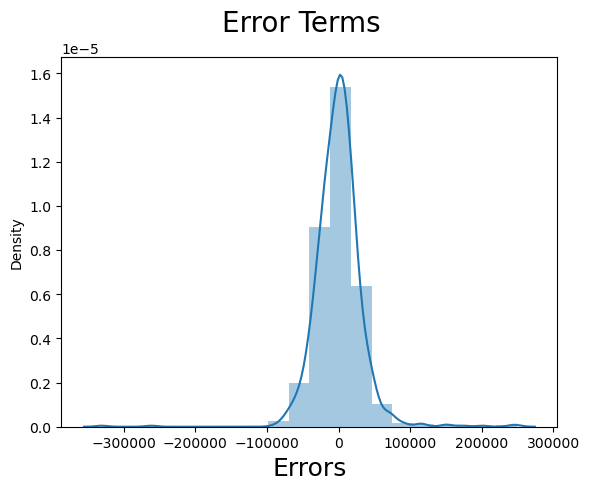

In [314]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [315]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.82

In [316]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1142527157594.6318
1119027578.4472399
33451.869580746


In [317]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

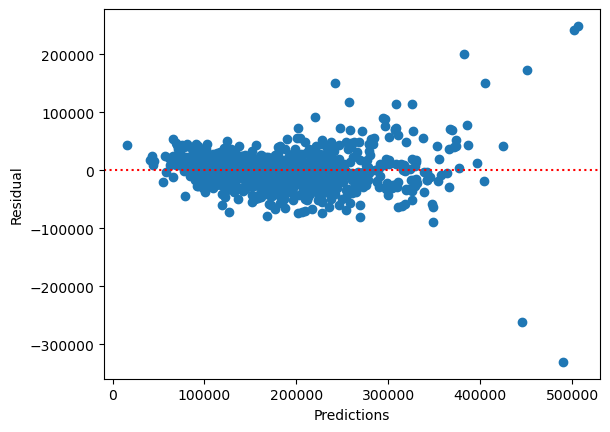

In [318]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [319]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,...,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,0
382,0.427132,-0.120835,0.648310,-0.532073,1.020432,-0.558025,1.051361,0.577925,1.236276,-1.226909,...,0,1,0,0,0,0,0,0,1,0
1170,0.291260,-0.059203,-0.066511,0.384025,-0.387685,-0.558025,-0.699764,-0.533302,1.236276,0.665348,...,0,1,0,0,0,0,0,0,0,0


In [320]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,...,0.002278,0.610478,0.015945,0.052392,0.004556,0.255125,0.054670,0.054670,0.314351,0.398633
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,...,0.047727,0.488198,0.125407,0.223070,0.067420,0.436429,0.227594,0.227594,0.464786,0.490176
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [321]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [322]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

In [323]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [324]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [325]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          2.94e-159
Time:                        18:41:01   Log-Likelihood:                -5169.0
No. Observations:                 439   AIC:                         1.037e+04
Df Residuals:                     421   BIC:                         1.045e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.824e+05   3256.358     56.008      0.000    1.76e+05    1.89e+05
OverallQual           2.046e+04   2918.461      7.012      0.000    1.47e+04    2.62e+04
BsmtExposure          8022.1441   1820.715      4.406      0.000    4443.320    1.16e+04
1stFlrSF              2.833e+04   2406.125     11.772      0.000    2.36e+04    3.31e+04
2ndFlrSF              2.134e+04   1916.772     11.132      0.000    1.76e+04    2.51e+04
KitchenQual           1.061e+04   2136.087      4.969      0.000    6414.495    1.48e+04
GarageCars            1.118e+04   2564.399      4.360      0.000    6141.055    1.62e+04
MSZoning_RM          -1.533e+04   4725.096     -3.245      0.001   -2.46e+04   -6044.348
Neighborhood_Edwards -3385.0321   7164.639     -0.472      0.637   -1.75e+04    1.07e+04
Neighborhood_NoRidge  3.987e+04   1.38e+04      2.885      0.004    1.27e+04     6.7e+04
Neighborhood_NridgHt  6.537e+04   8840.573      7.394      0.000     4.8e+04    8.27e+04
Neighborhood_Somerst  4367.2711   7123.530      0.613      0.540   -9634.845    1.84e+04
Neighborhood_StoneBr  7.592e+04   1.02e+04      7.465      0.000    5.59e+04    9.59e+04
Exterior1st_BrkFace   1.367e+04   7613.920      1.795      0.073   -1299.433    2.86e+04
Exterior1st_Stucco    7955.4931   1.48e+04      0.537      0.591   -2.11e+04    3.71e+04
GarageType_Attchd    -4504.5573   3953.051     -1.140      0.255   -1.23e+04    3265.618
GarageFinish_NA       7548.8190   8694.759      0.868      0.386   -9541.729    2.46e+04
GarageFinish_RFn     -1909.3661   3764.020     -0.507      0.612   -9307.979    5489.247
==============================================================================
Omnibus:                       78.066   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.900
Skew:                           0.527   Prob(JB):                    8.70e-121
Kurtosis:                       8.396   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [327]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.81

In [328]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

523923823066.4355
1193448344.1148872
34546.3217161377


In [329]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [330]:
#check final VIf of columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.86
5,GarageCars,2.54
4,KitchenQual,1.98
2,1stFlrSF,1.90
14,GarageType_Attchd,1.83
15,GarageFinish_NA,1.68
16,GarageFinish_RFn,1.63
3,2ndFlrSF,1.54
9,Neighborhood_NridgHt,1.38
8,Neighborhood_NoRidge,1.25


Text(0, 0.5, 'y_pred')

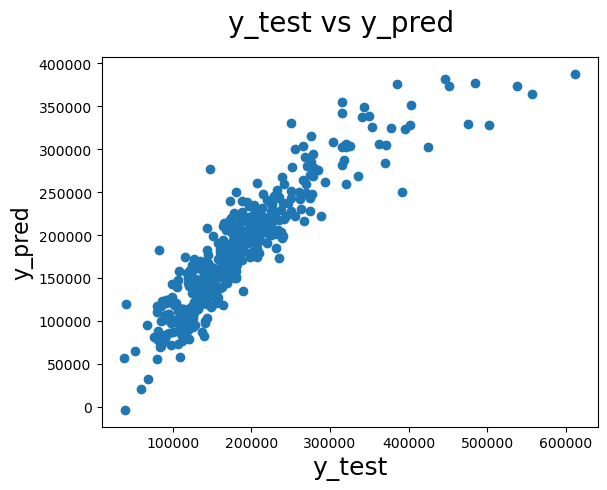

In [331]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

In [332]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

In [333]:
#final dataframe 
final_df = house[['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageFinish_NA', 'GarageFinish_RFn']]
final_df.head()

,OverallQual,BsmtExposure,1stFlrSF,2ndFlrSF,KitchenQual,GarageCars,MSZoning_RM,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Exterior1st_BrkFace,Exterior1st_Stucco,GarageType_Attchd,GarageFinish_NA,GarageFinish_RFn
0,7,1,856,854,4,2,0,0,0,0,0,0,0,0,1,0,1
1,6,4,1262,0,3,2,0,0,0,0,0,0,0,0,1,0,1
2,7,2,920,866,4,2,0,0,0,0,0,0,0,0,1,0,1
3,7,1,961,756,4,3,0,0,0,0,0,0,0,0,0,0,0
4,8,3,1145,1053,4,3,0,0,1,0,0,0,0,0,1,0,1


### Final evalution
- No of Variables = `17` i.e. `'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'GarageCars', 'MSZoning_RM', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'GarageType_Attchd', 'GarageFinish_NA', 'GarageFinish_RFn'`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.82`
- r2 score for Test Data set model = `0.81`

In [334]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8209726030321283
0.814587832477228
1142527157594.6318
523923823066.4355
1119027578.4472399
1193448344.1148872


### Ridge Regression

In [335]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [336]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [337]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 22168.00833773  10640.3229021   22939.00802421  19284.23239019
  11347.69807536   9482.12810796 -16317.16503111 -12400.17706828
  43771.3828673   33960.6832858   11243.93548123  10682.78719991
  11556.93890181 -11930.72170611   8826.78613251  12271.12496276
  -7411.74473397]


In [338]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8186744460137303
0.8108970263349873
1157193665907.9238
534353026770.13715
1133392424.983275
1217205072.3693328


## Lasso

In [339]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [340]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [341]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [342]:
lasso.coef_

array([ 21487.29253965,  10786.90179723,  22783.64994684,  19081.97180186,
        10954.33395608,   8843.47735088, -16521.89135432, -12817.403155  ,
        56716.28452173,  41387.9202052 ,  13799.67967798,  13994.52243576,
        12652.89201218, -11554.0621753 ,   8758.39799985,  11004.32881721,
        -7546.27141853])

In [343]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8204028559138198
0.8116146726096163
1146163201946.8018
532325155650.15344
1122588836.3827636
1212585775.968459


In [344]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.209726e-01,8.186744e-01,8.204029e-01
1,R2 Score (Test),8.145878e-01,8.108970e-01,8.116147e-01
2,RSS (Train),1.142527e+12,1.157194e+12,1.146163e+12
3,RSS (Test),5.239238e+11,5.343530e+11,5.323252e+11
4,MSE (Train),3.345187e+04,3.366589e+04,3.350506e+04
5,MSE (Test),3.454632e+04,3.488847e+04,3.482220e+04


## Lets observe the changes in the coefficients after regularization

In [345]:
betas = pd.DataFrame(index=X.columns)

In [346]:
betas.rows = X.columns

In [347]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [348]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,20624.544465,22168.008338,21487.292540
BsmtExposure,10891.531479,10640.322902,10786.901797
1stFlrSF,22716.139006,22939.008024,22783.649947
2ndFlrSF,19387.604846,19284.232390,19081.971802
KitchenQual,10754.263695,11347.698075,10954.333956
GarageCars,9050.355983,9482.128108,8843.477351
MSZoning_RM,-16964.235815,-16317.165031,-16521.891354
Neighborhood_Edwards,-14312.910464,-12400.177068,-12817.403155
Neighborhood_NoRidge,60786.493526,43771.382867,56716.284522
Neighborhood_NridgHt,45378.222939,33960.683286,41387.920205


### Question 1: Double the values of Alpha for lasso & Ridge

In [349]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 22874.99652794  10508.15706735  22998.93875477  19158.28446434
  11707.64563047   9684.32352598 -15470.0933217  -10896.33120497
  34543.27132625  27585.08774264   8395.51537065   6491.33275981
   8870.86649602  -9565.24572124   8307.19847581  10702.74595295
  -6531.42440877]
0.8154506124261041
0.8087764831959396


___Coeff values are decreasing as alpha will increase.r2_score of train data is drop from .818 to 0.815 and test data is drop from 0.81 to 0.808___

In [350]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 22337.37007157  10681.19710844  22849.25774722  18777.03178297
  11158.14114246   8641.3851618  -16079.9037537  -11325.31764628
  52656.21546072  37409.08781599  10562.83604217   4062.30976541
   8546.27361622  -7492.73219211   7841.06553833   8289.0750671
  -6457.99585983]
0.8186967149277249
0.8072914628029457


___As alpha value increased more feature coeff are decreasing in value. r2score is train data is also drop from .82 to 0.818 and test data is drop from 0.811 to 0.807___

### Que3: Drop the Top 5 features and rebuild lasso
___Top 5 features are `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `1stFlrSF`, `OverallQual`, `2ndFlrSF`___

In [351]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '1stFlrSF', 'OverallQual'
                               , '2ndFlrSF'], axis=1)

In [352]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '1stFlrSF', 'OverallQual'
                               , '2ndFlrSF'], axis=1)

In [353]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [354]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [355]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [356]:
lasso.coef_

array([ 11687.23641664,  31525.84050609,  30571.11511526, -19577.62122139,
       -11449.64784105,      0.        ,      0.        ,   2866.74538684,
            0.        ,  13535.85810006,  35477.86232579,  -1829.93273463])

In [357]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6097819214214963
0.6183430003165437


___After dropping the top 5 features model r2 score is low i.e. 60.9% for Train and 61.8% for Test.___

In [358]:
X_train_new.columns

Index(['BsmtExposure', 'KitchenQual', 'GarageCars', 'MSZoning_RM',
       'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'GarageType_Attchd',
       'GarageFinish_NA', 'GarageFinish_RFn'],
      dtype='object')

___Five most important predictor variables now are `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Exterior1st_BrkFace`, `GarageFinish_NA`, `KitchenQual`___